# Hierarchical Clustering (HC) - Cars

In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

random_s = 101

## Dataset

In [2]:
# Load Dataset

df = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/cluster_mpg.csv')
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Data Preprocessing

In [3]:
# Drop the name variable

df_reduced = df.drop('name', axis = 1)
df_reduced.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [4]:
# The origin variable is non-numeric
# We can do encoding using dummy variables

df_reduced = pd.get_dummies(df_reduced).astype('float')
df_reduced.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,0.0,0.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,0.0,0.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,0.0,0.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,0.0,0.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,0.0,0.0,1.0


### MinMax Scaling

In [5]:
# For hierarchical clustering, literature recommends a Min-Max Scaler (0 to 1)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_reduced)
scaled

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

In [6]:
# Construct DataFrame from the scaled data

df_reduced_scaled = pd.DataFrame(scaled, columns = df_reduced.columns)
df_reduced_scaled.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0


### Principal Component Analysis

In [7]:
# Principal Component Analysis

from sklearn.decomposition import PCA

# Apply PCA

pca = PCA()
pca.fit(df_reduced_scaled)

# Extract the explained variance ration and components

explained_variance = pca.explained_variance_ratio_
components = pca.components_ # should you need to see the feature loadings value

# Display the explained variance and components

explained_variance, components

(array([5.52964776e-01, 1.91338616e-01, 1.43891701e-01, 6.73824276e-02,
        2.13926739e-02, 1.19211620e-02, 6.19330816e-03, 2.72697856e-03,
        2.18835653e-03, 6.53395424e-18]),
 array([[-2.24092850e-01,  3.97726029e-01,  3.27719965e-01,
          2.18330873e-01,  2.76249350e-01, -9.96861107e-02,
         -1.44113960e-01, -2.46081069e-01, -3.45293726e-01,
          5.91374795e-01],
        [-6.46895252e-02, -5.14612089e-03, -6.92809283e-05,
          8.16710101e-03,  3.16015172e-02,  2.06901118e-02,
         -1.93855944e-01,  7.47884055e-01, -6.16552180e-01,
         -1.31331875e-01],
        [ 2.11353488e-01, -3.32949837e-01, -2.46079628e-01,
         -2.72050472e-01, -2.11286179e-01,  1.74654838e-01,
          4.57510915e-01, -1.01422672e-01, -4.02066330e-01,
          5.03489002e-01],
        [ 8.30439139e-02,  3.26842257e-01,  2.14446912e-01,
          1.48274383e-01,  2.55193304e-01, -5.47672967e-02,
          8.20521260e-01,  1.88080443e-01,  1.51968610e-02,
         -2.0

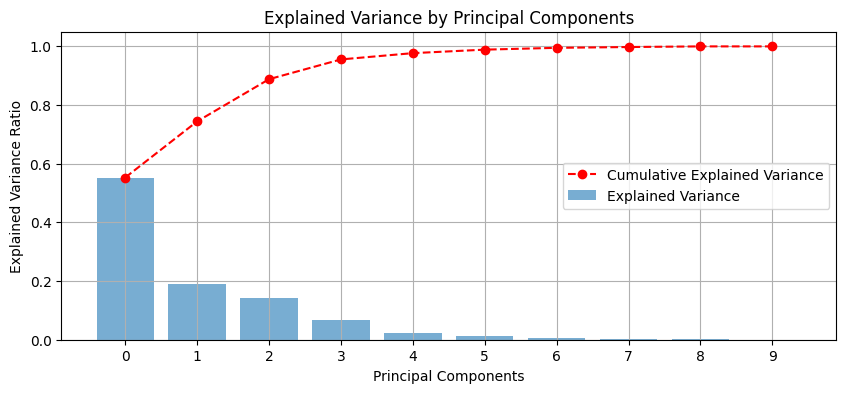

In [8]:
# Plot the explained variance of each principal component

plt.figure(figsize=(10, 4))

# Plot the cumulative explained variance

plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--', label = 'Cumulative Explained Variance', color = 'red')

# Plot the individual explained variance for each component

plt.bar(range(0, len(explained_variance)), explained_variance, alpha = 0.6, label='Explained Variance')

plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(0, len(explained_variance)))
plt.grid(True)
plt.legend(loc = 'center right')
plt.show()

### PCA 3D

In [9]:
# Project the original data onto the first two principal components

pca_3d = PCA(n_components = 3)
data_pca_3d = pca_3d.fit_transform(df_reduced_scaled)

# Reconstruct into a DataFrame

data_pca_3d_df = pd.DataFrame(data_pca_3d, columns = ['PC0', 'PC1', 'PC2'])
data_pca_3d_df

,PC0,PC1,PC2
0,0.827285,0.050104,-0.317192
1,0.940878,0.057889,-0.429666
2,0.860939,0.049149,-0.360080
3,0.854835,0.053797,-0.351844
4,0.845469,0.049929,-0.346719
...,...,...,...
387,0.040437,-0.159006,0.708712
388,-1.080191,0.694631,0.410074
389,-0.011005,-0.177058,0.731023
390,-0.021490,-0.158818,0.778473


## HC Modeling

In [10]:
# Agglomerative Clustering as alternative using Seaborn Scatterplot
# Create an Agglomerative Clustering model

from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')

# Fit the model and predict the clusters
clusters_3d = agg_clustering.fit_predict(data_pca_3d_df)

# Create a new column and assign the clusters
data_pca_3d_df['Cluster'] = pd.DataFrame(clusters_3d)

# Add the word 'Cluster'
data_pca_3d_df['Cluster'] = data_pca_3d_df['Cluster'].apply(lambda x: f'Cluster {x}')

# Sort by Cluster
data_pca_3d_df = data_pca_3d_df.sort_values('Cluster')


# Plot the Scatter Plot (In 3D)

# Create a 3D scatter plot with Plotly

import plotly.express as px

fig = px.scatter_3d(data_pca_3d_df, x = 'PC0', y = 'PC1', z = 'PC2',
                    color = 'Cluster', title = "3D Scatter Plot with Legend")

fig.show()

In [11]:
# 3D Plot with Trace

import plotly.graph_objs as go

# Create the main 3D scatter plot

fig = px.scatter_3d(data_pca_3d_df,
                    x='PC0',
                    y='PC1',
                    z='PC2',
                    color='Cluster',
                    opacity = 0.75,
                    title='3D Scatter Plot')

# Add the specific data point (index 210) as a separate trace with a black color

fig.add_trace(go.Scatter3d(
    x=[data_pca_3d_df.iloc[305]['PC0']],
    y=[data_pca_3d_df.iloc[305]['PC1']],
    z=[data_pca_3d_df.iloc[305]['PC2']],
    mode='markers',
    marker=dict(
        color='black',
        size=10,
        symbol='circle'
    ),
    name='Data 305'
))

# Set axis limits and ticks using update_layout

fig.update_layout(
    coloraxis_showscale = False, # Remove Color Bar
    scene = dict(
        xaxis = dict(nticks=6, range=[-1, 1], title='X Axis', tickvals=[-1, -0.5, 0, 0.5, 1]),  # Set limits and custom ticks for x-axis
        yaxis = dict(nticks=6, range=[-1, 1], title='Y Axis', tickvals=[-1, -0.5, 0, 0.5, 1]),  # Set limits and custom ticks for y-axis
        zaxis = dict(nticks=6, range=[-1, 1], title='Z Axis', tickvals=[-1, -0.5, 0, 0.5, 1])  # Set limits and custom ticks for z-axis
    )
)

# Show the plot
fig.show()

In [12]:
data_pca_3d_df.loc[305]

,305
PC0,0.308076
PC1,-0.115107
PC2,0.373491
Cluster,Cluster 3
